In [33]:
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Set the colors for the plot
polygon_color = '#CCE5FF'
point_color = '#FFFF88'
point_color_2 = 'lightgray'
line_color = '#333333'

# 1 Polygon

In [35]:
def plot_single_polygon(ax, polygon_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=True, if_line=True):
    
    # generate a polygon
    polygon = Polygon(polygon_points)

    # create a GeoDataFrame with the single polygon
    gdf = gpd.GeoDataFrame(index=[0], crs='EPSG:3857', geometry=[polygon])

    gdf.plot(ax=ax, color=polygon_color, edgecolor='black', linewidth=1)

    if centroid_type == 'centroid':
        centroid = gdf.geometry.centroid
    elif centroid_type == 'representative_point':
        centroid = gdf.geometry.representative_point()
    # plot the representative point
    if if_centroid:
        centroid.plot(ax=ax, color=point_color, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

    # plot the lines from the polygon to the representative point
    if if_line:
        for point in polygon_points:
            line = gpd.GeoSeries([LineString([point, centroid.iloc[0]])])
            line.plot(ax=ax, color=line_color, linewidth=0.5, linestyle='--')

    return centroid


## 1.1 representative point

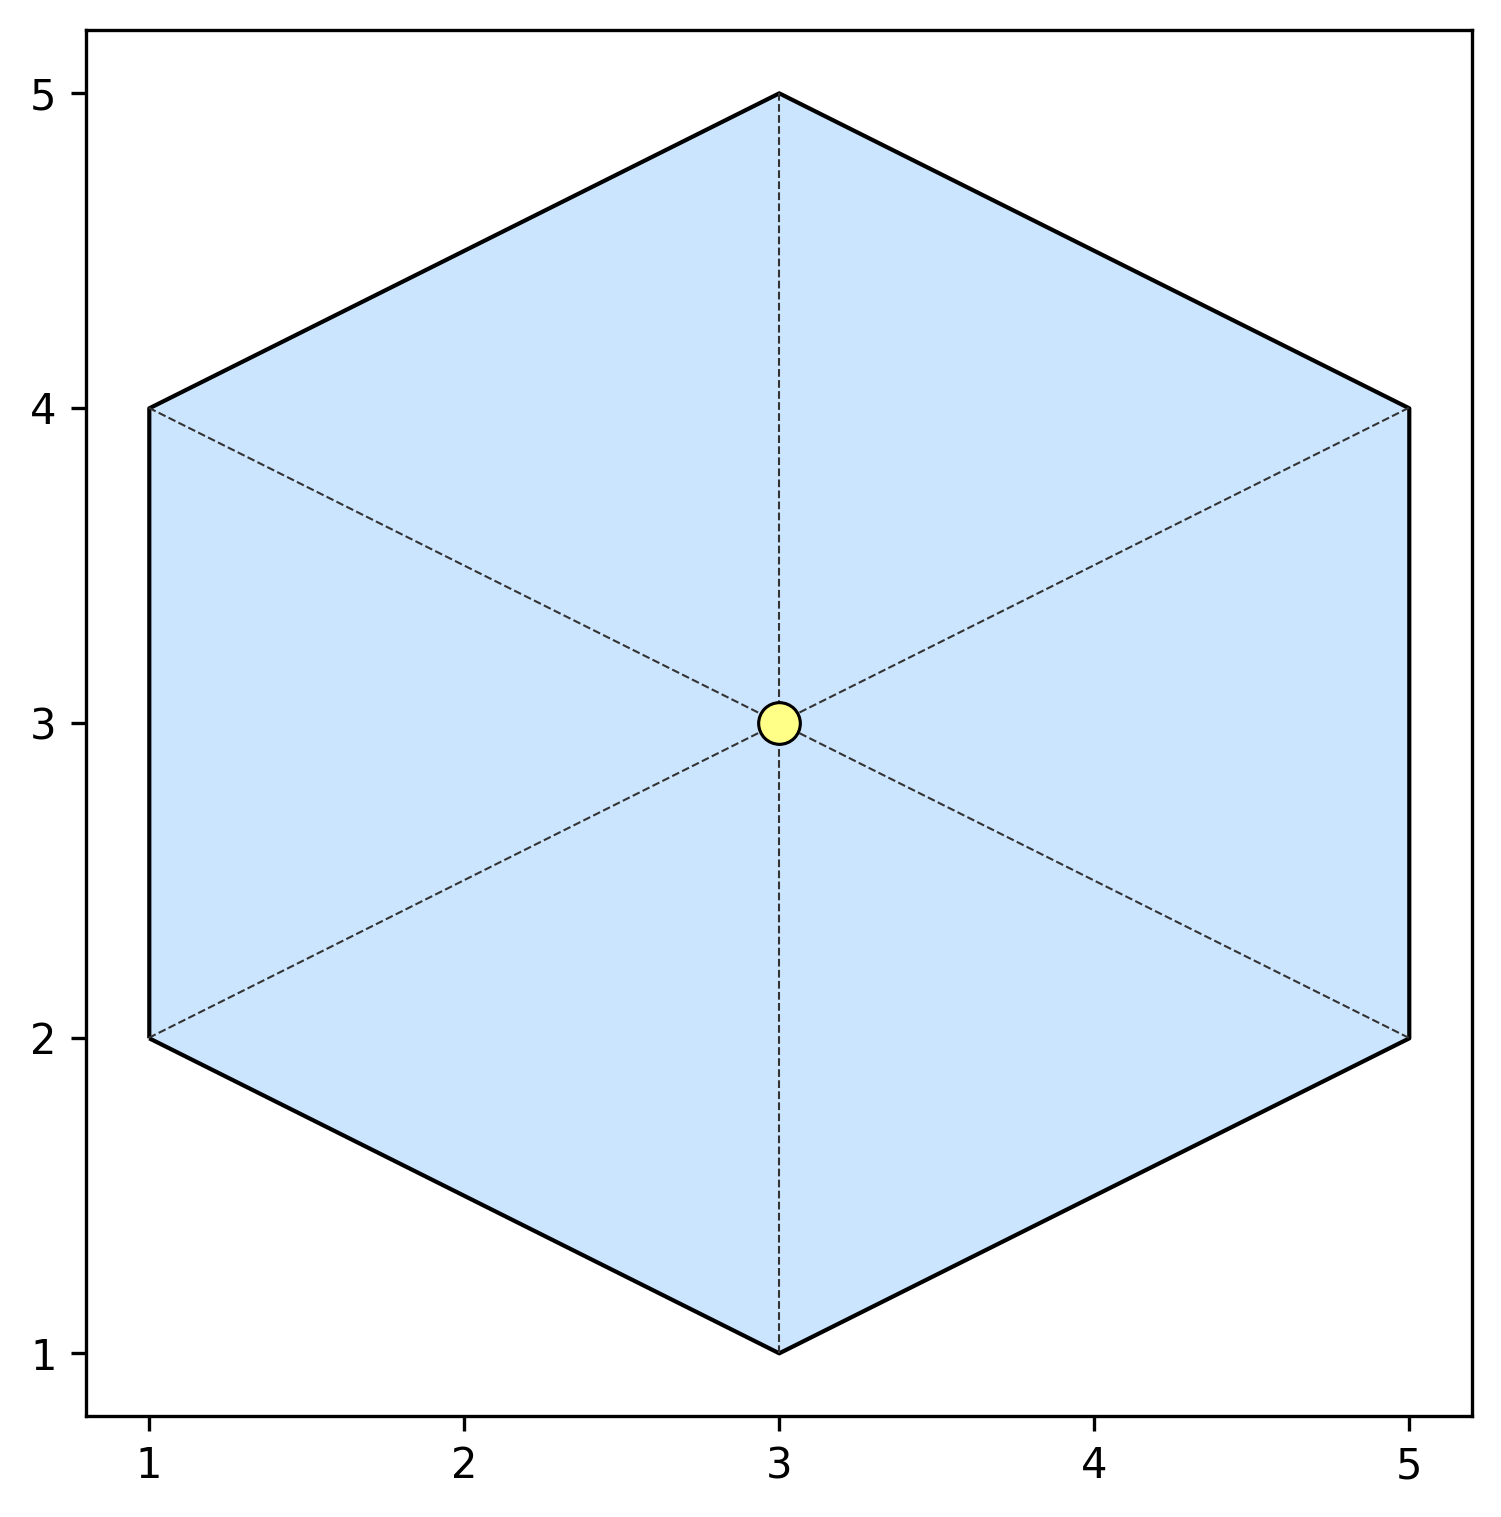

In [36]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)
hexagon_points = [(1, 2), (3, 1), (5, 2), (5, 4), (3, 5), (1, 4)]
centroid = plot_single_polygon(ax, hexagon_points, polygon_color, point_color, line_color, centroid_type='representative_point', if_centroid=True, if_line=True)

ax.set_xticks([1, 2, 3, 4, 5]);
ax.set_yticks([1, 2, 3, 4, 5]);

## 1.2 with direction

### 1.2.1 W-E

#### without distance

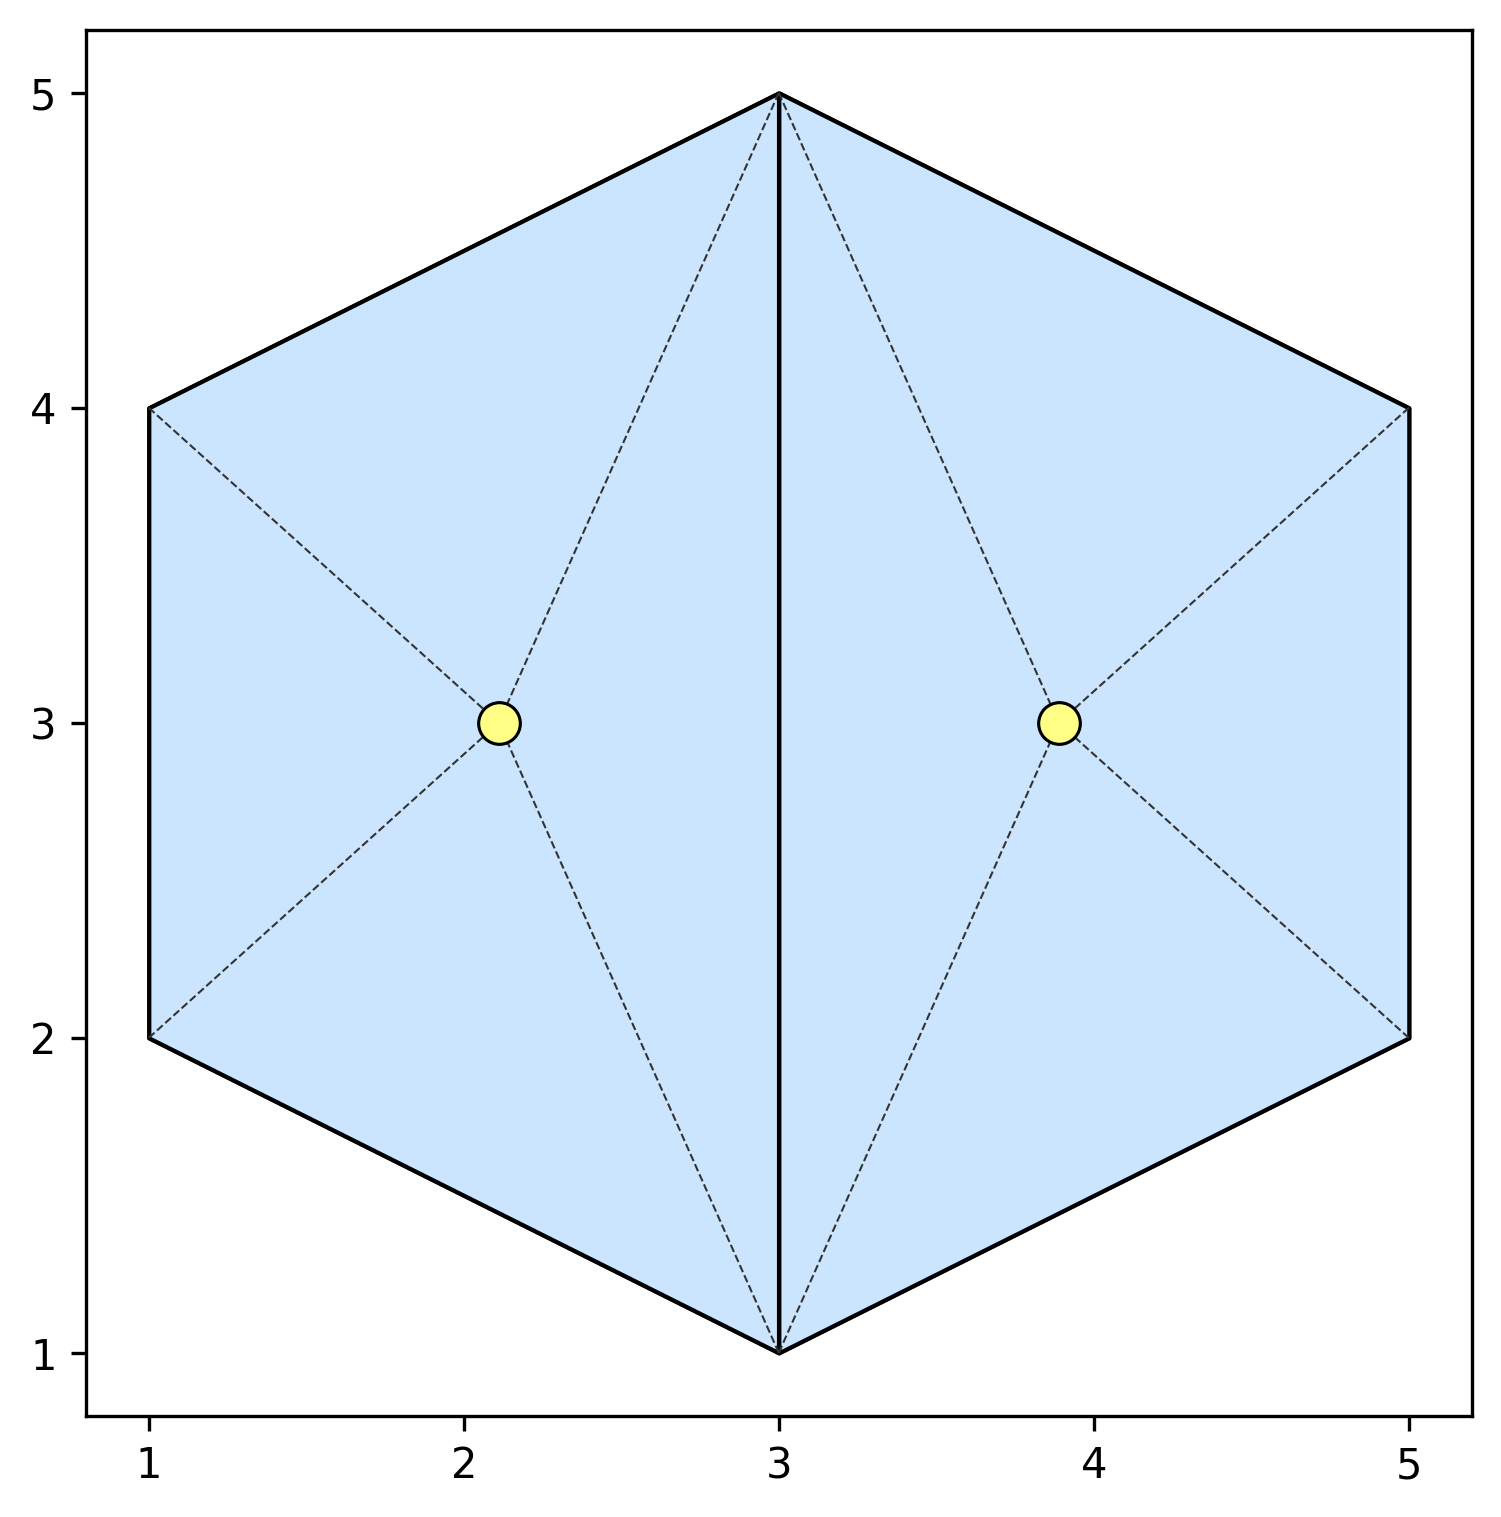

In [37]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

hexagon_points = [(3, 5), (1, 4), (1, 2), (3, 1), (5, 2), (5, 4)]
centroid = plot_single_polygon(ax, hexagon_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=False, if_line=False)

# plot a vertical line from passing through the centroid
line = gpd.GeoSeries([LineString([(3, 1), (3, 5)])])
line.plot(ax=ax, color='black', linewidth=1)

hexagon_west_points = [(3, 5), (1, 4), (1, 2), (3, 1)]
centroid_west = plot_single_polygon(ax, hexagon_west_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

hexagon_east_points = [(3, 1), (5, 2), (5, 4), (3, 5)]
centroid_east = plot_single_polygon(ax, hexagon_east_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

ax.set_xticks([1, 2, 3, 4, 5]);
ax.set_yticks([1, 2, 3, 4, 5]);

#### with distance

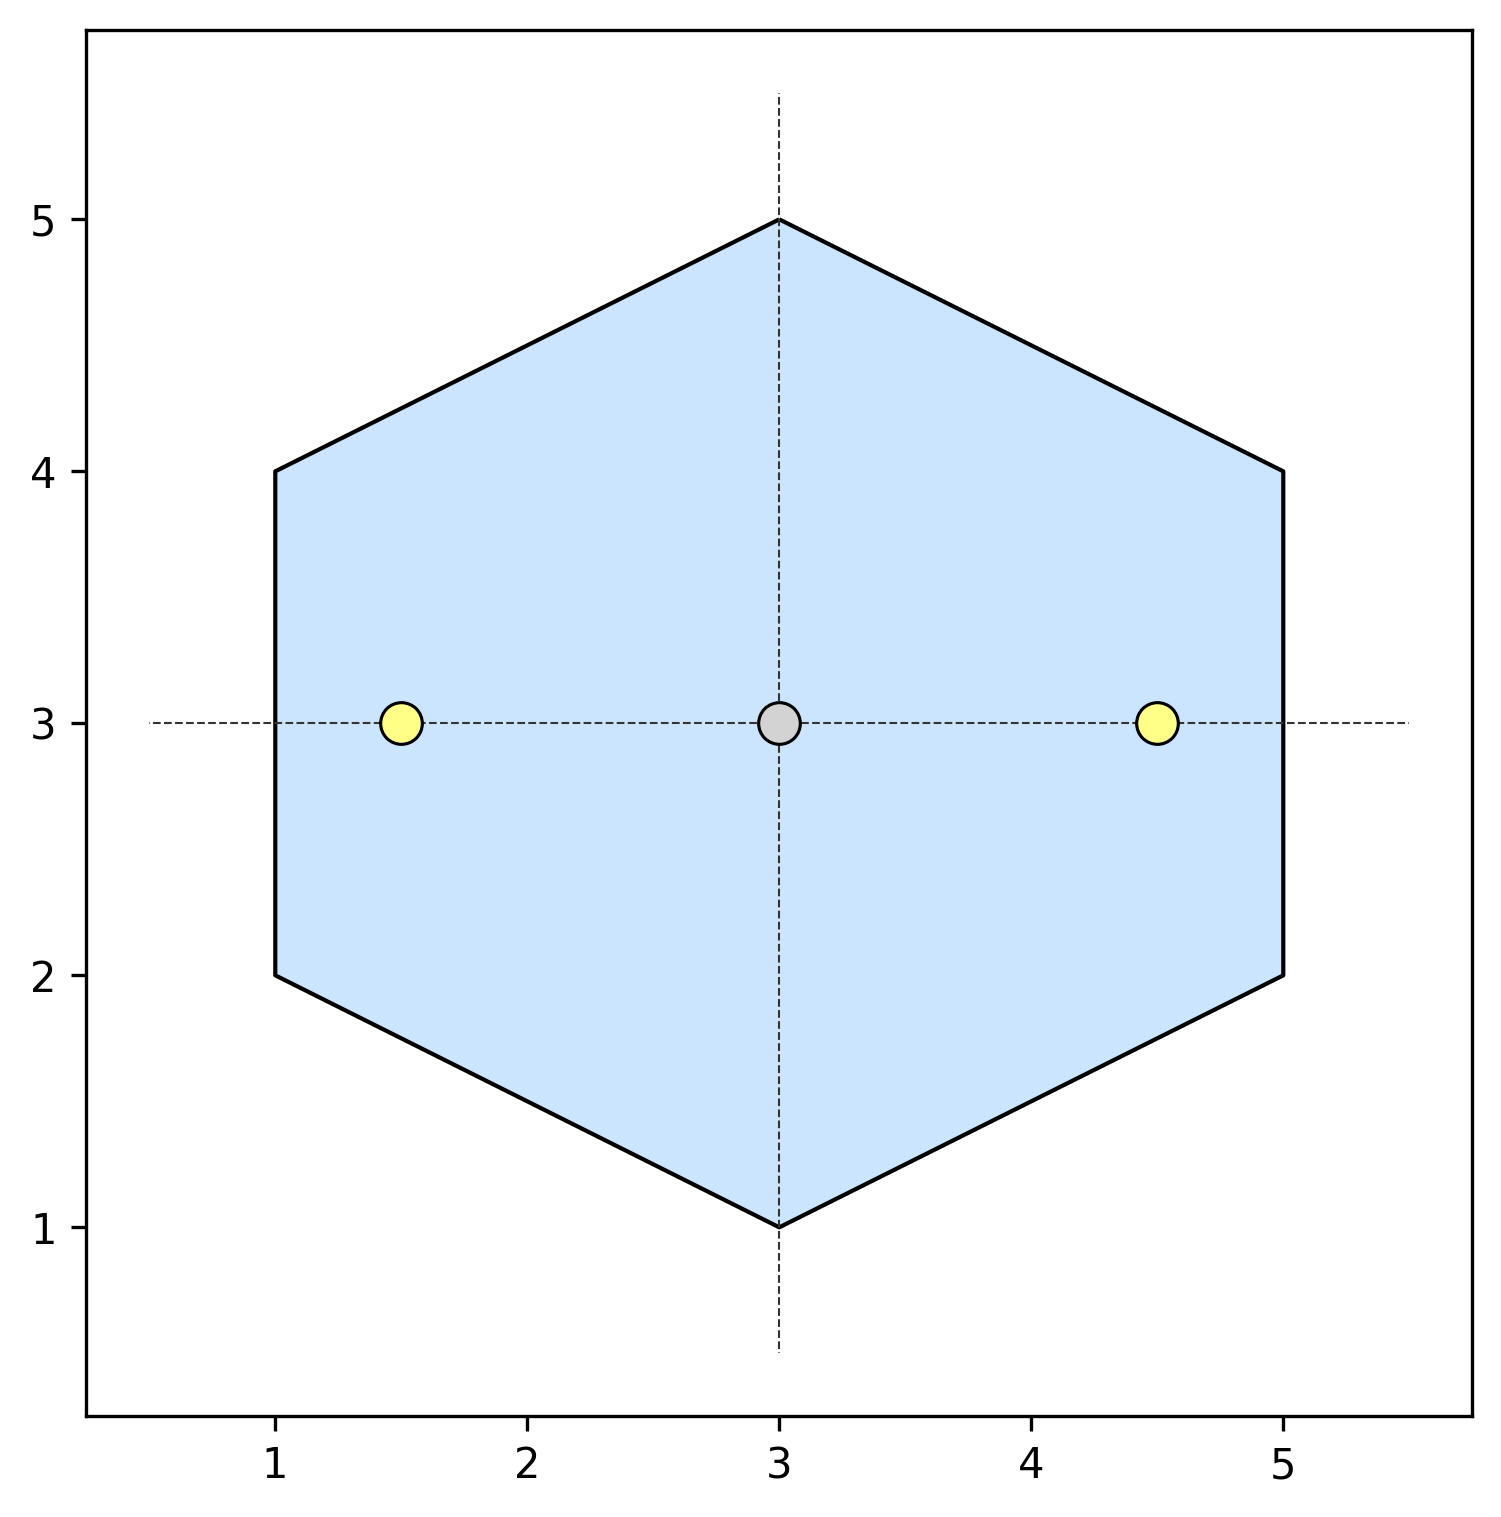

In [38]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

hexagon_points = [(3, 5), (1, 4), (1, 2), (3, 1), (5, 2), (5, 4)]
centroid = plot_single_polygon(ax, hexagon_points, polygon_color, point_color_2, line_color, centroid_type='centroid', if_centroid=True, if_line=False)

# plot lines in the specific directions and points on the lines
for angle in range(0, 360, 90):
    radians = np.radians(angle)
    line_length = 2.5
    centroid_x = centroid.x[0]
    centroid_y = centroid.y[0]
    end_x = centroid_x + line_length * np.cos(radians)
    end_y = centroid_y + line_length * np.sin(radians)
    if angle in [0, 180]:
        point_x = centroid_x + 1.5 * np.cos(radians)
        point_y = centroid_y + 1.5 * np.sin(radians)
        point = gpd.GeoSeries([Point(point_x, point_y)])
        point.plot(ax=ax, color=point_color, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)
    ax.plot([centroid_x, end_x], [centroid_y, end_y], color=line_color, linewidth=0.5, linestyle='--')

### 1.2.2 N-S

#### without distance

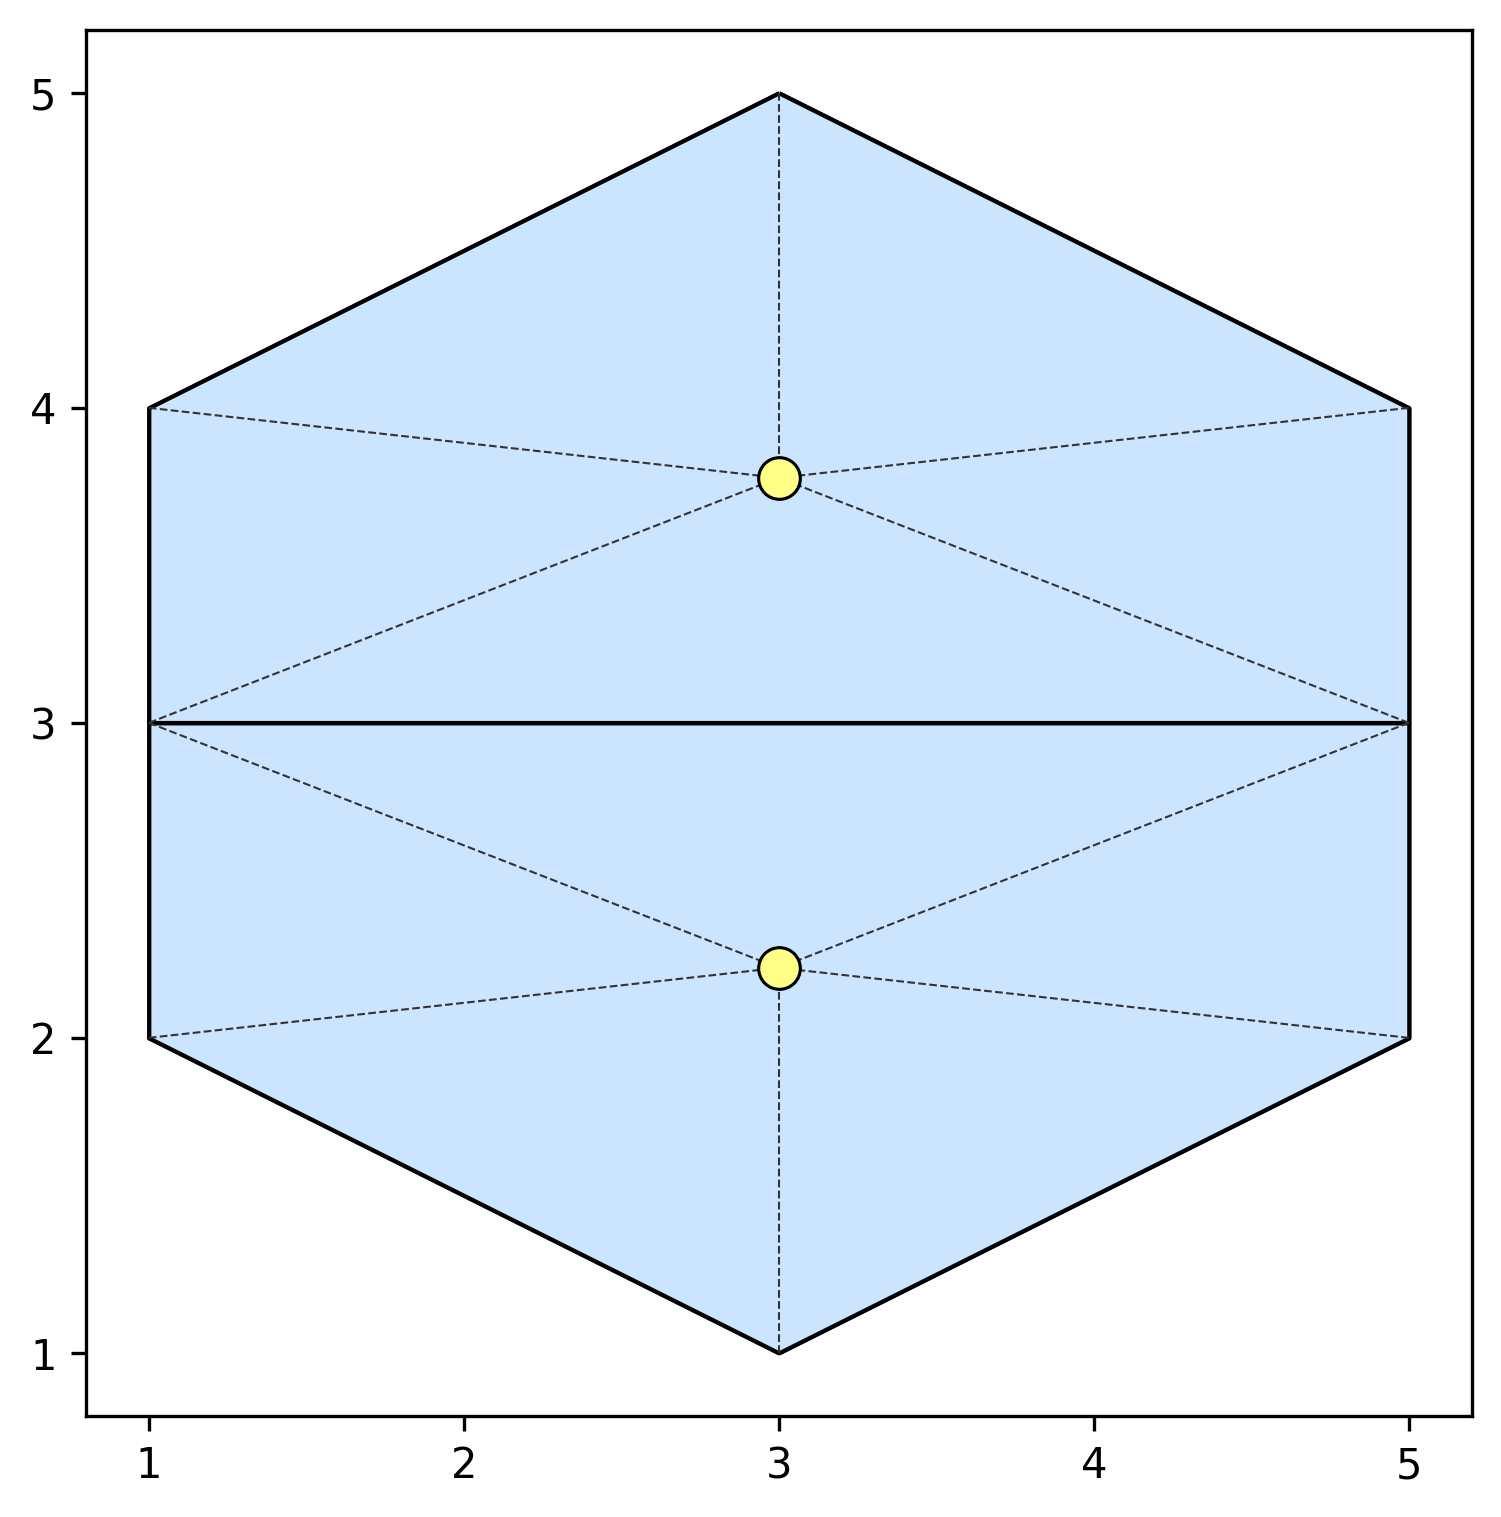

In [39]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

hexagon_points = [(3, 5), (1, 4), (1, 2), (3, 1), (5, 2), (5, 4)]
centroid = plot_single_polygon(ax, hexagon_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=False, if_line=False)

# plot a horizontal line passing through the centroid
line = gpd.GeoSeries([LineString([(1, 3), (5, 3)])])
line.plot(ax=ax, color='black', linewidth=1)

hexagon_north_points = [(3, 5), (1, 4), (1, 3), (5, 3), (5, 4)]
centroid_north = plot_single_polygon(ax, hexagon_north_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

hexagon_south_points = [(3, 1), (1, 2), (1, 3), (5, 3), (5, 2)]
centroid_south = plot_single_polygon(ax, hexagon_south_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

ax.set_xticks([1, 2, 3, 4, 5]);
ax.set_yticks([1, 2, 3, 4, 5]);

#### with distance

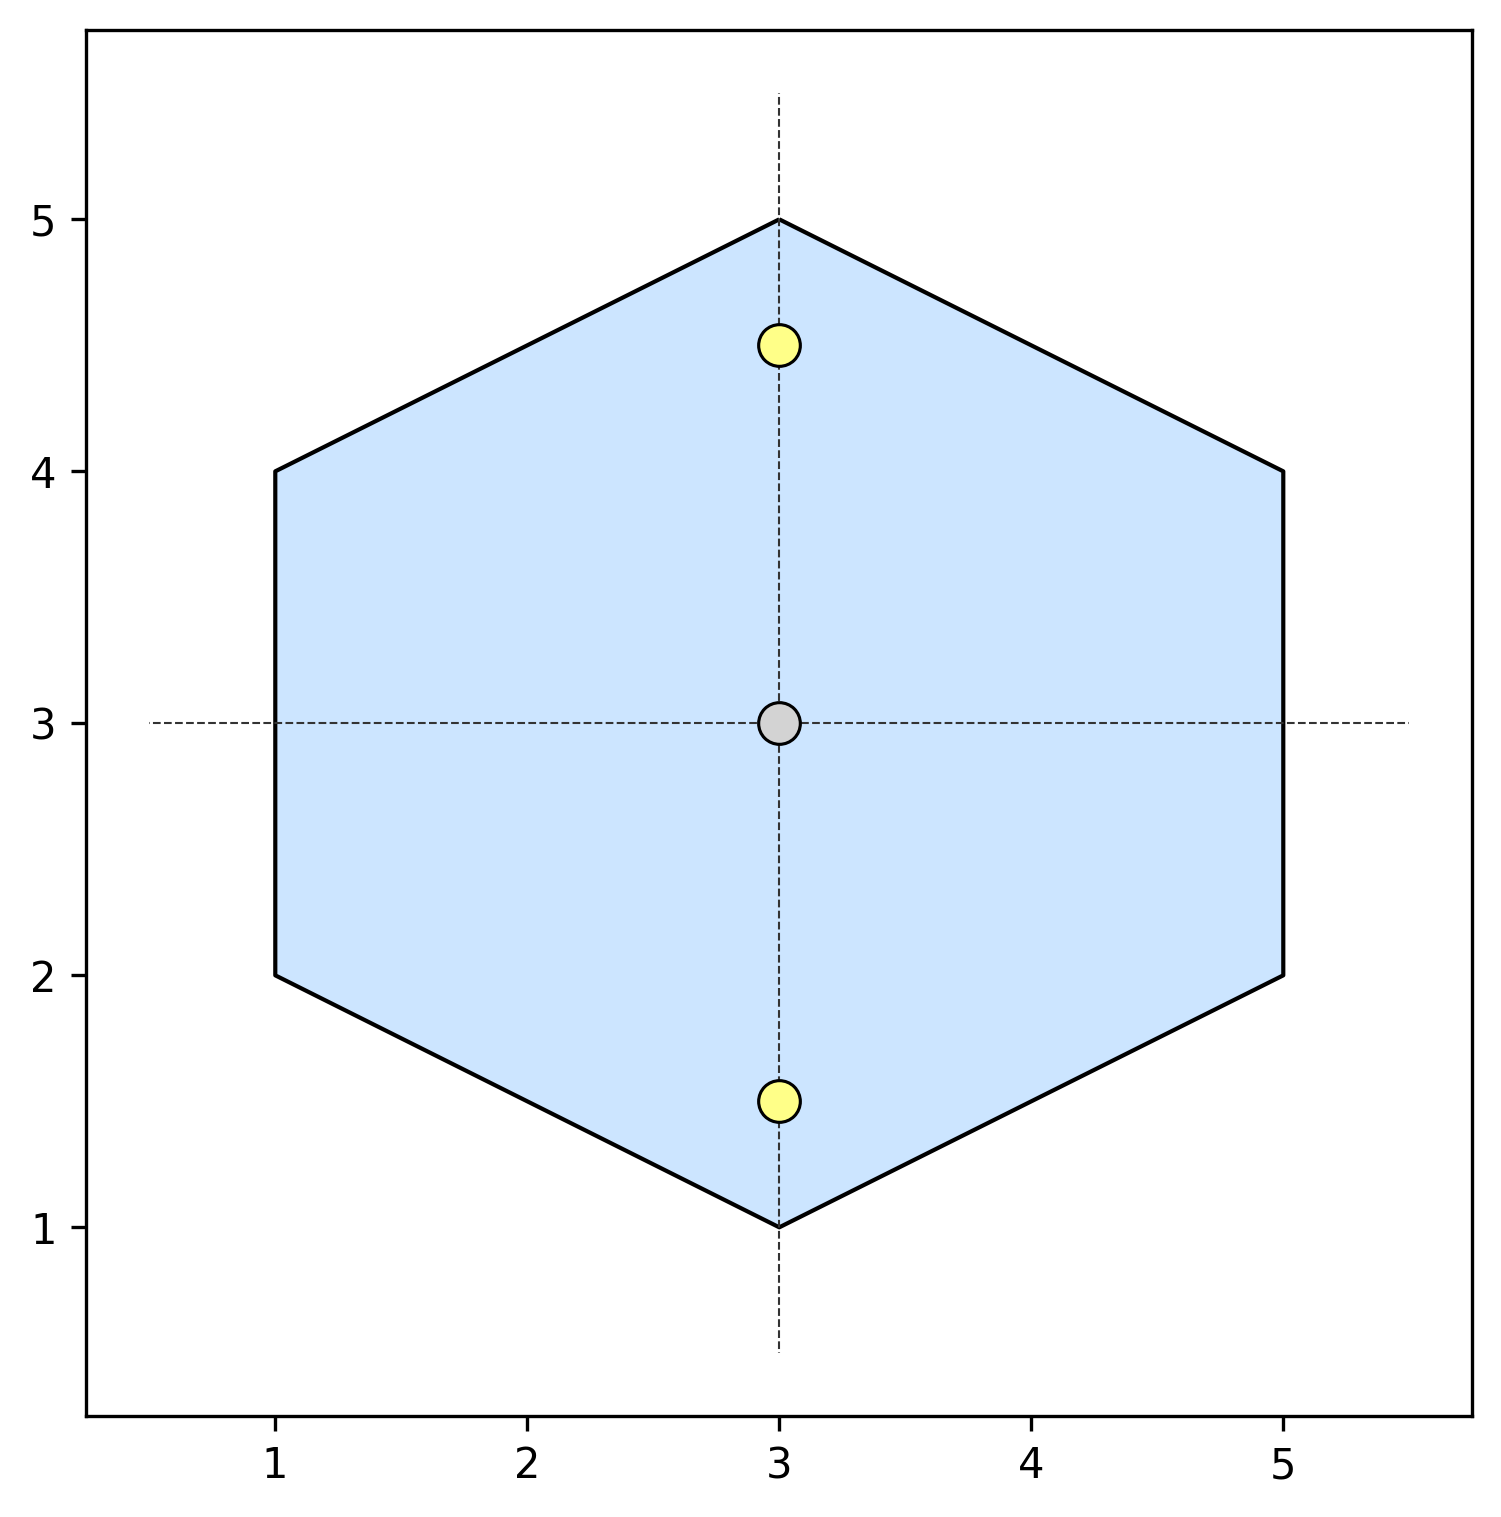

In [40]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

hexagon_points = [(3, 5), (1, 4), (1, 2), (3, 1), (5, 2), (5, 4)]
centroid = plot_single_polygon(ax, hexagon_points, polygon_color, point_color_2, line_color, centroid_type='centroid', if_centroid=True, if_line=False)

# plot lines in the specific directions and points on the lines
for angle in range(0, 360, 90):
    radians = np.radians(angle)
    line_length = 2.5
    centroid_x = centroid.x[0]
    centroid_y = centroid.y[0]
    end_x = centroid_x + line_length * np.cos(radians)
    end_y = centroid_y + line_length * np.sin(radians)
    if angle in [90, 270]:
        point_x = centroid_x + 1.5 * np.cos(radians)
        point_y = centroid_y + 1.5 * np.sin(radians)
        point = gpd.GeoSeries([Point(point_x, point_y)])
        point.plot(ax=ax, color=point_color, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)
    ax.plot([centroid_x, end_x], [centroid_y, end_y], color=line_color, linewidth=0.5, linestyle='--')



### 1.2.3 NW-SW-NE-SE

#### without distance

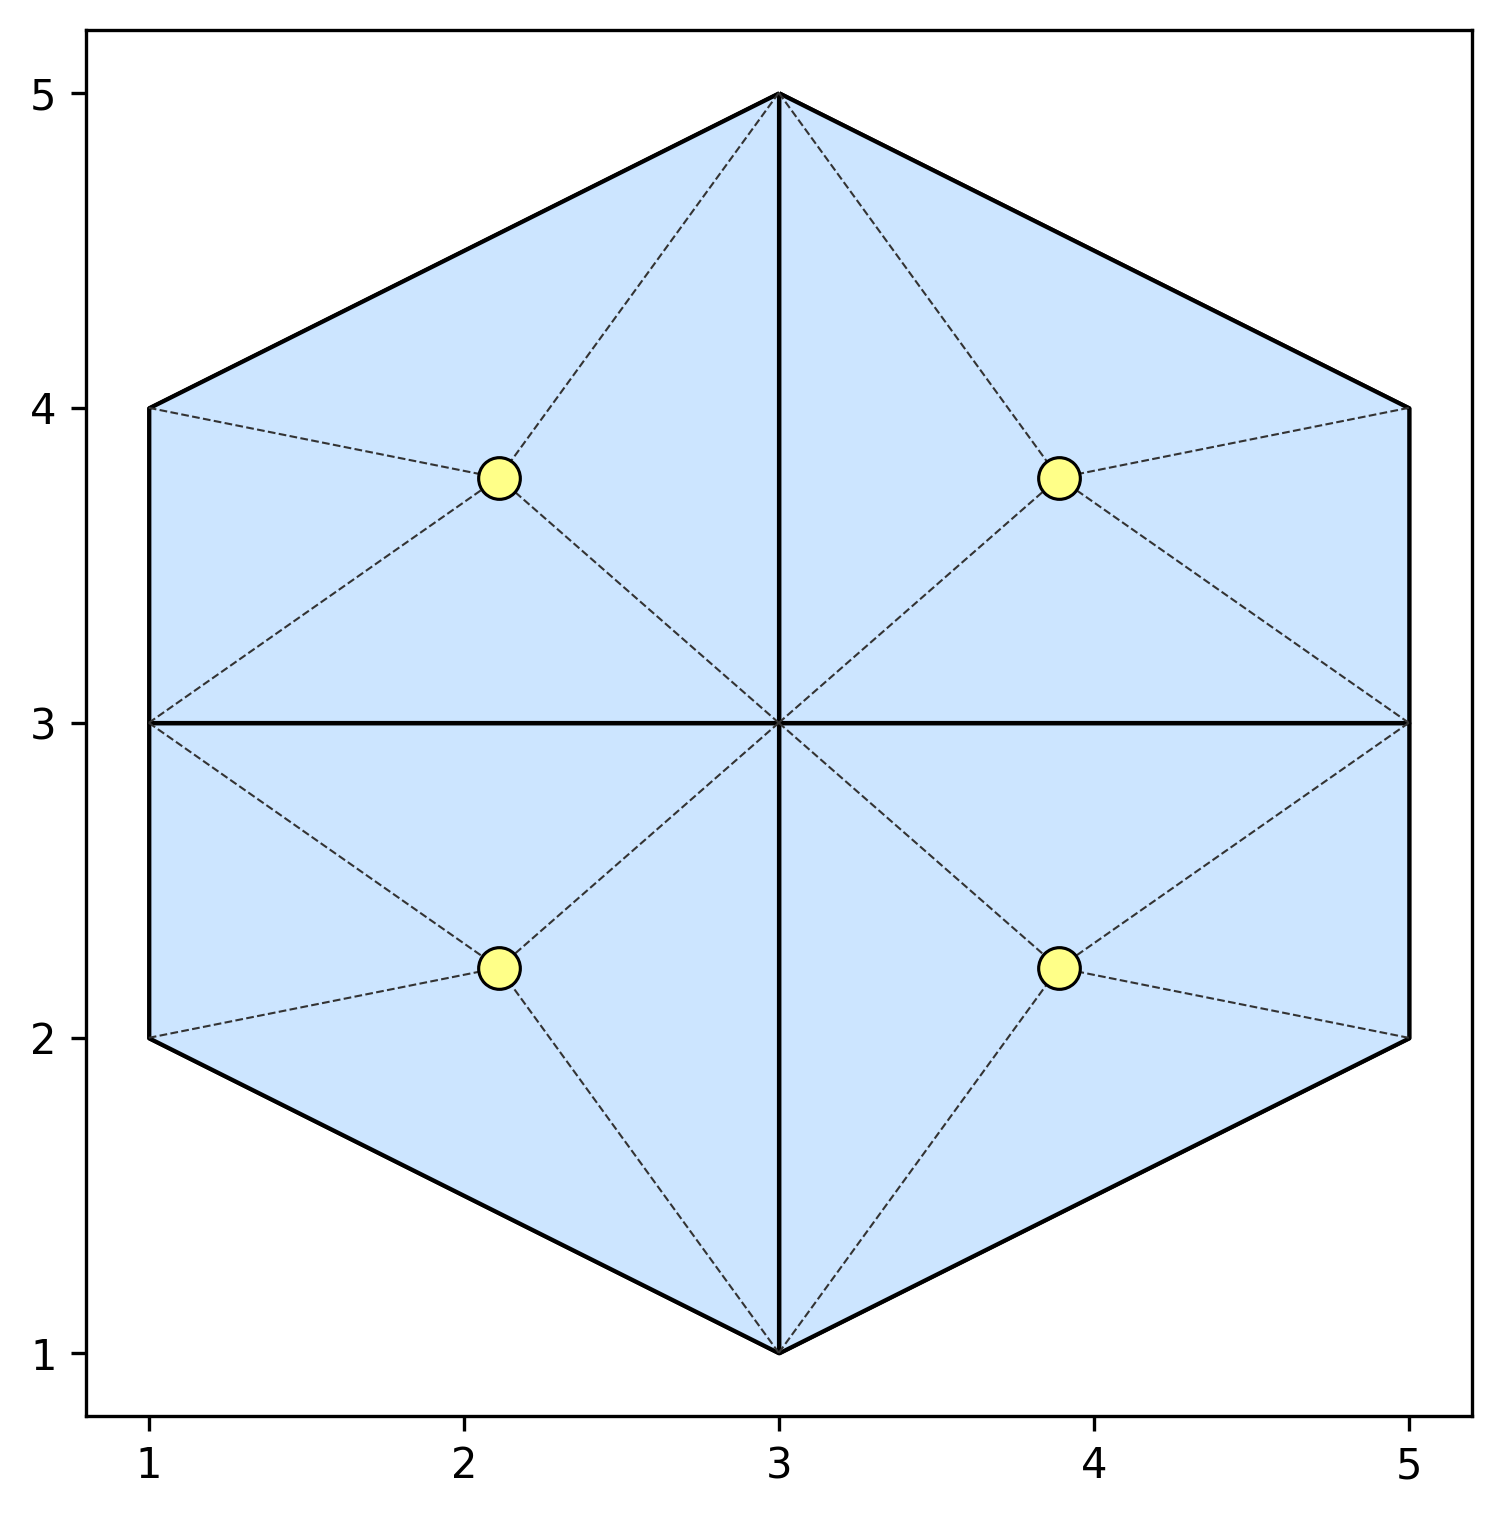

In [41]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

hexagon_points = [(3, 5), (1, 4), (1, 2), (3, 1), (5, 2), (5, 4)]
centroid = plot_single_polygon(ax, hexagon_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=False, if_line=False)

# plot a vertical line from passing through the centroid
line = gpd.GeoSeries([LineString([(3, 1), (3, 5)])])
line.plot(ax=ax, color='black', linewidth=1)

# plot a horizontal line passing through the centroid
line = gpd.GeoSeries([LineString([(1, 3), (5, 3)])])
line.plot(ax=ax, color='black', linewidth=1)

hexagon_northwest_points = [(3, 5), (1, 4), (1, 3), (3, 3)]
centroid_northwest = plot_single_polygon(ax, hexagon_northwest_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

hexagon_northeast_points = [(3, 5), (5, 4), (5, 3), (3, 3)]
centroid_northeast = plot_single_polygon(ax, hexagon_northeast_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

hexagon_southwest_points = [(3, 1), (1, 2), (1, 3), (3, 3)]
centroid_southwest = plot_single_polygon(ax, hexagon_southwest_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

hexagon_southeast_points = [(3, 1), (5, 2), (5, 3), (3, 3)]
centroid_southeast = plot_single_polygon(ax, hexagon_southeast_points, polygon_color, point_color, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

# set x-stick
ax.set_xticks([1, 2, 3, 4, 5]);
ax.set_yticks([1, 2, 3, 4, 5]);

#### with distance

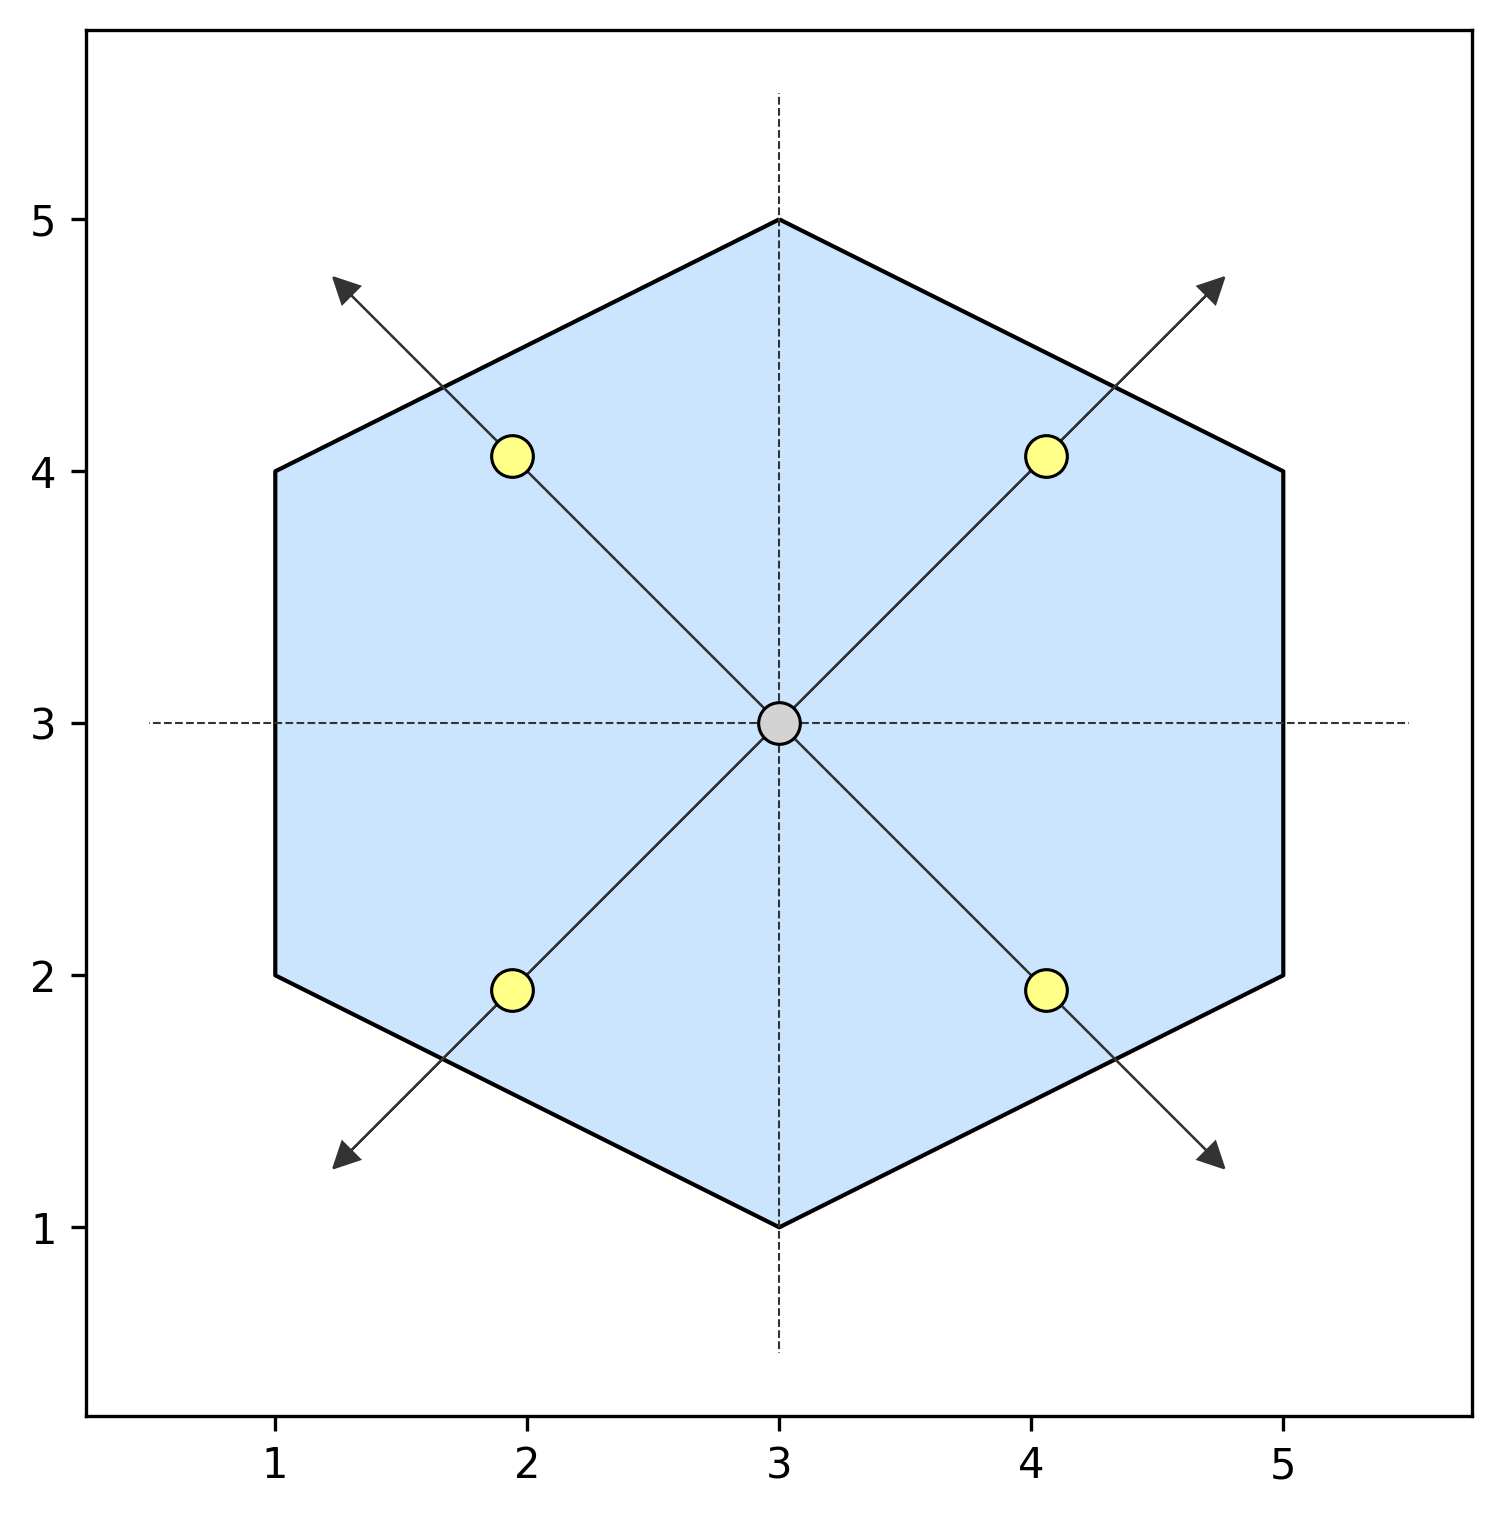

In [42]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

hexagon_points = [(3, 5), (1, 4), (1, 2), (3, 1), (5, 2), (5, 4)]
centroid = plot_single_polygon(ax, hexagon_points, polygon_color, point_color_2, line_color, centroid_type='centroid', if_centroid=True, if_line=False)

# plot lines in the specific directions and points on the lines
for angle in range(0, 360, 45):
    radians = np.radians(angle)
    line_length = 2.5
    centroid_x = centroid.x[0]
    centroid_y = centroid.y[0]
    end_x = centroid_x + line_length * np.cos(radians)
    end_y = centroid_y + line_length * np.sin(radians)
    if angle in range(45, 360, 90):
        point_x = centroid_x + 1.5 * np.cos(radians)
        point_y = centroid_y + 1.5 * np.sin(radians)
        point = gpd.GeoSeries([Point(point_x, point_y)])
        point.plot(ax=ax, color=point_color, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

        # plot an arrow
        ax.arrow(centroid_x, centroid_y, end_x - centroid_x, end_y - centroid_y, color=line_color, linewidth=0.5, head_width=0.1, head_length=0.1, length_includes_head=True)
    
    ax.plot([centroid_x, end_x], [centroid_y, end_y], color=line_color, linewidth=0.5, linestyle='--')

## 1.3 between

### 1.3.1 between two locations

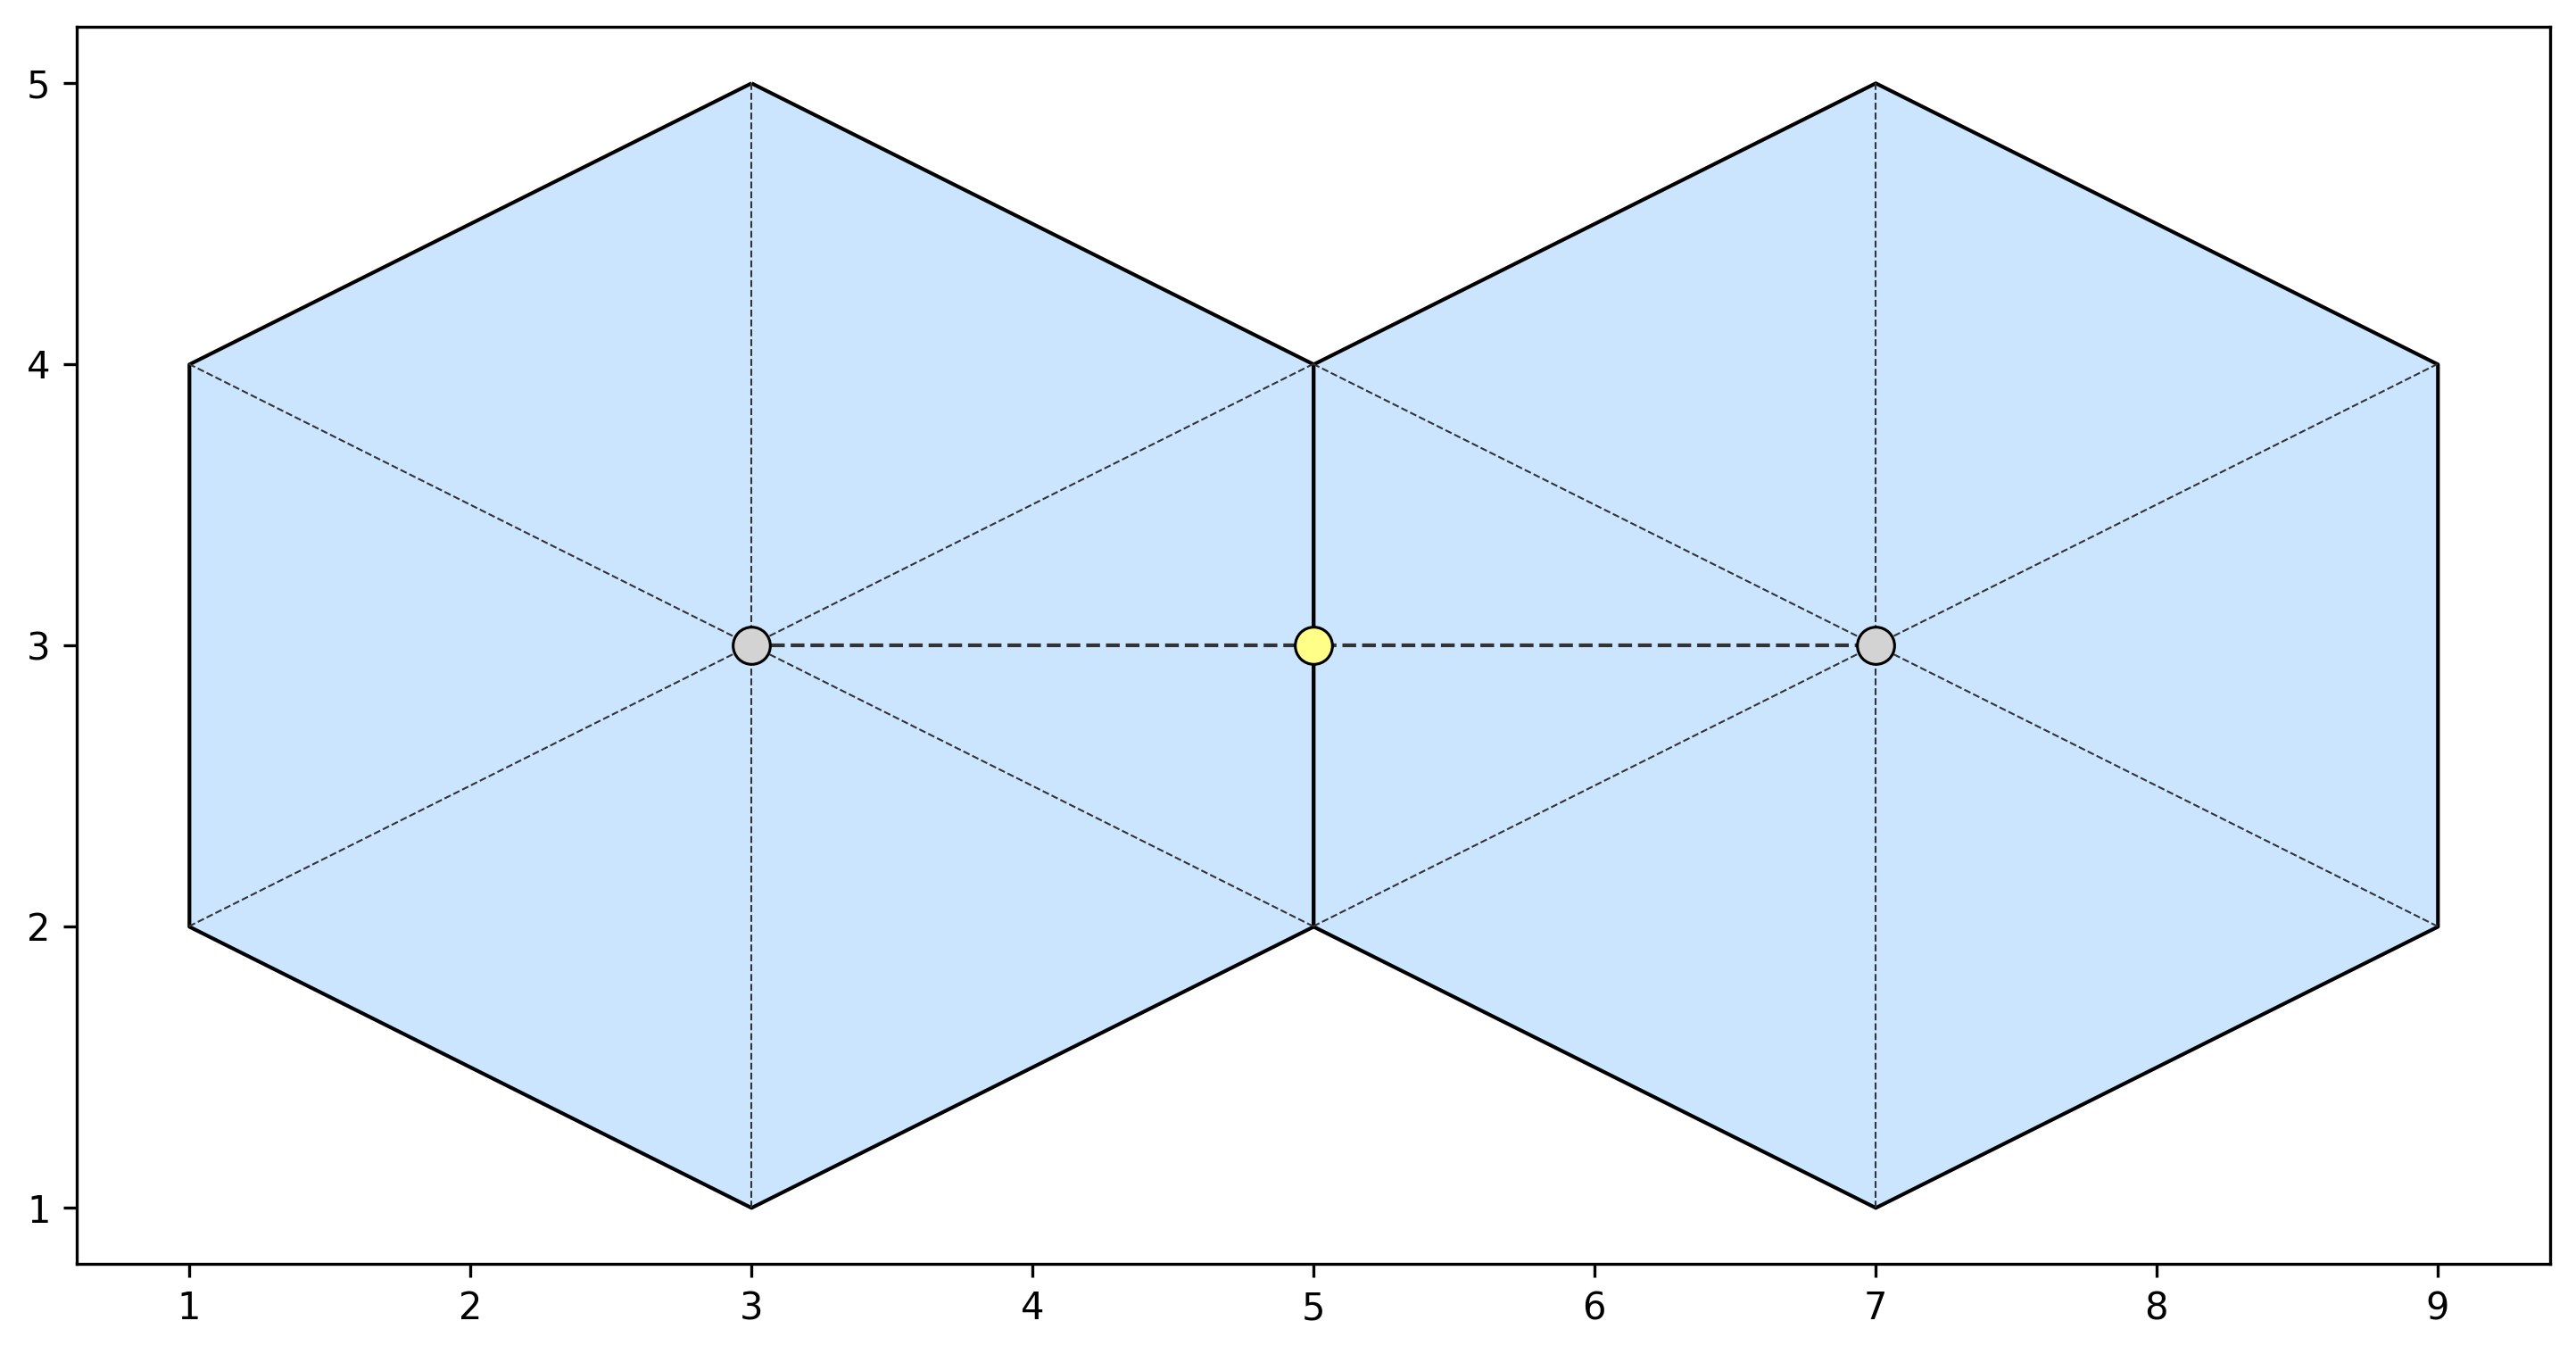

In [43]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

hexagon_points_1 = [(3, 5), (1, 4), (1, 2), (3, 1), (5, 2), (5, 4)]
centroid_1 = plot_single_polygon(ax, hexagon_points_1, polygon_color, point_color_2, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

hexagon_points_2 = [(5, 2), (5, 4), (7, 5), (9, 4), (9, 2), (7, 1)]
centroid_2 = plot_single_polygon(ax, hexagon_points_2, polygon_color, point_color_2, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

# plot a line connecting the two centroids
line = gpd.GeoSeries([LineString([centroid_1.iloc[0], centroid_2.iloc[0]])])
line.plot(ax=ax, color=line_color, linewidth=1, linestyle='--')
# plot the centroid of the line
line_centroid = line.centroid
line_centroid.plot(ax=ax, color=point_color, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

# set x-stick
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9]);
ax.set_yticks([1, 2, 3, 4, 5]);

### 1.3.2 among multiple locations

<Axes: >

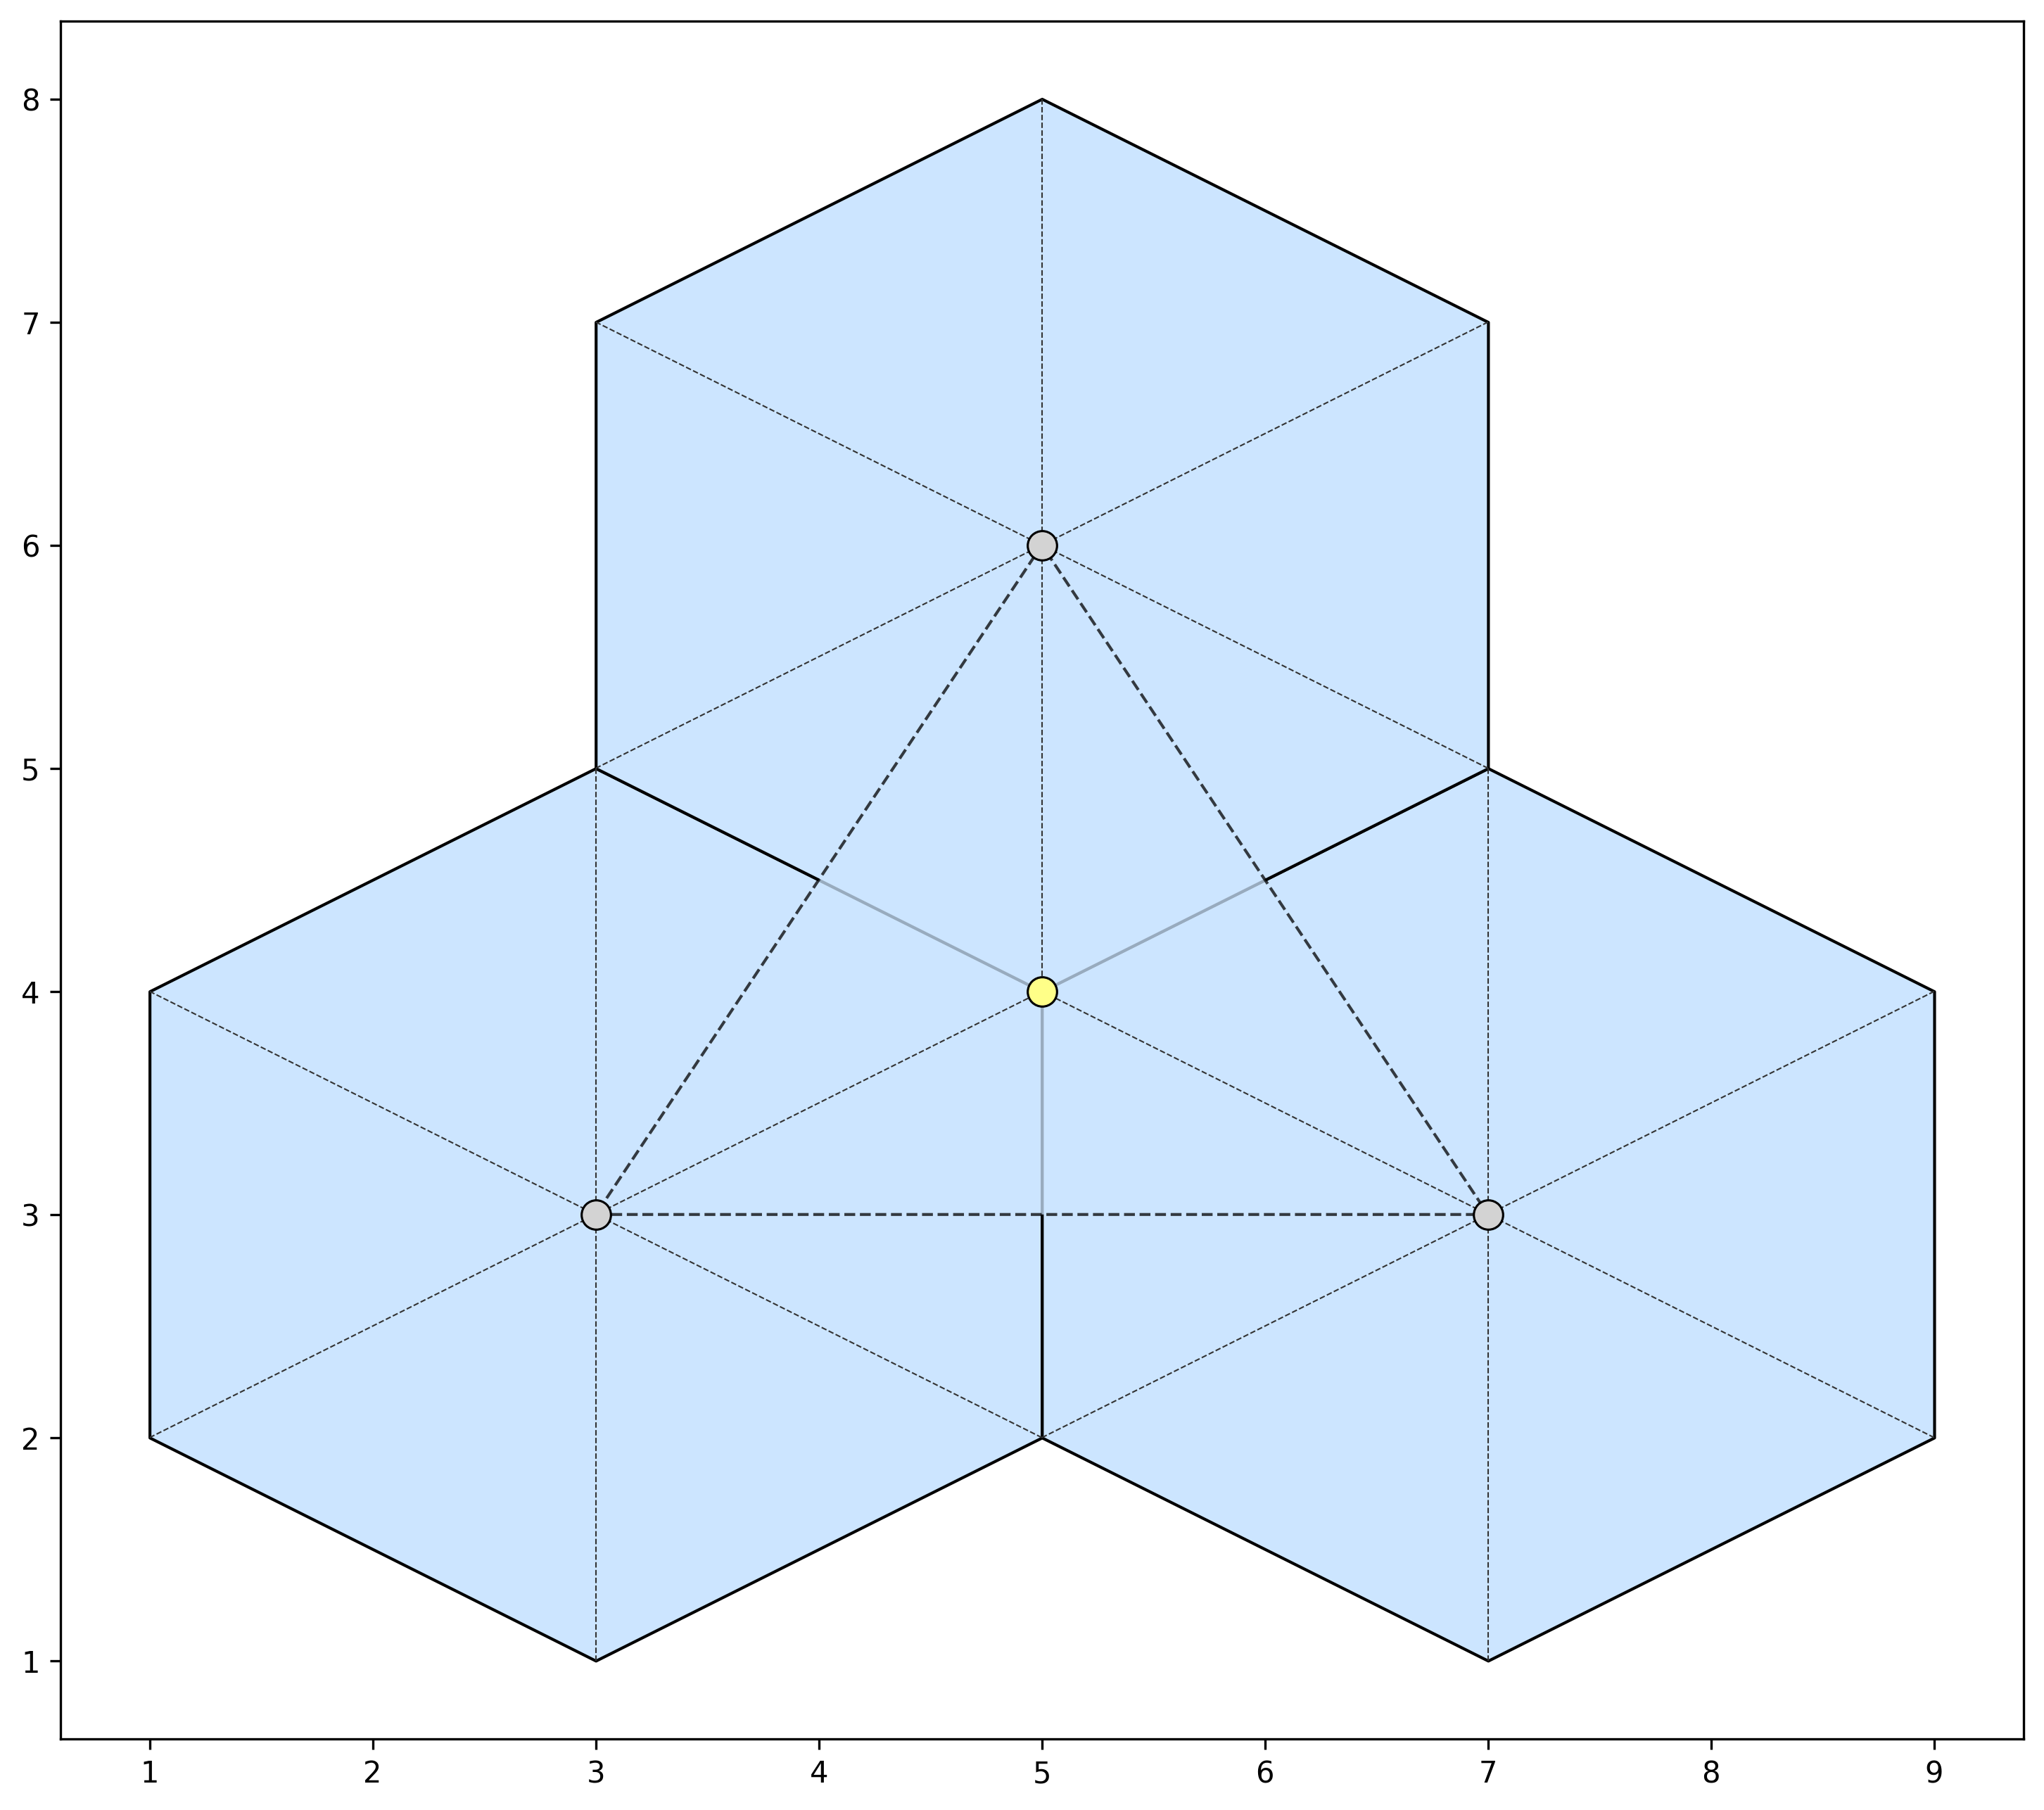

In [44]:
fig, ax = plt.subplots(figsize=(12, 12), dpi=300)

hexagon_points_1 = [(3, 5), (1, 4), (1, 2), (3, 1), (5, 2), (5, 4)]
centroid_1 = plot_single_polygon(ax, hexagon_points_1, polygon_color, point_color_2, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

hexagon_points_2 = [(5, 2), (5, 4), (7, 5), (9, 4), (9, 2), (7, 1)]
centroid_2 = plot_single_polygon(ax, hexagon_points_2, polygon_color, point_color_2, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

hexagon_points_3 = [(5, 4), (3, 5), (3, 7), (5, 8), (7, 7), (7, 5)]
centroid_3 = plot_single_polygon(ax, hexagon_points_3, polygon_color, point_color_2, line_color, centroid_type='centroid', if_centroid=True, if_line=True)

# plot the polygon connecting the three centroids and its centroid
polygon = Polygon([centroid_1.iloc[0], centroid_2.iloc[0], centroid_3.iloc[0]])
gdf = gpd.GeoDataFrame(index=[0], crs='EPSG:3857', geometry=[polygon])
gdf.plot(ax=ax, color=polygon_color, edgecolor='black', linewidth=1, linestyle='--', alpha=0.75)
polygon_centroid = gdf.geometry.centroid
polygon_centroid.plot(ax=ax, color=point_color, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

# 2 Point

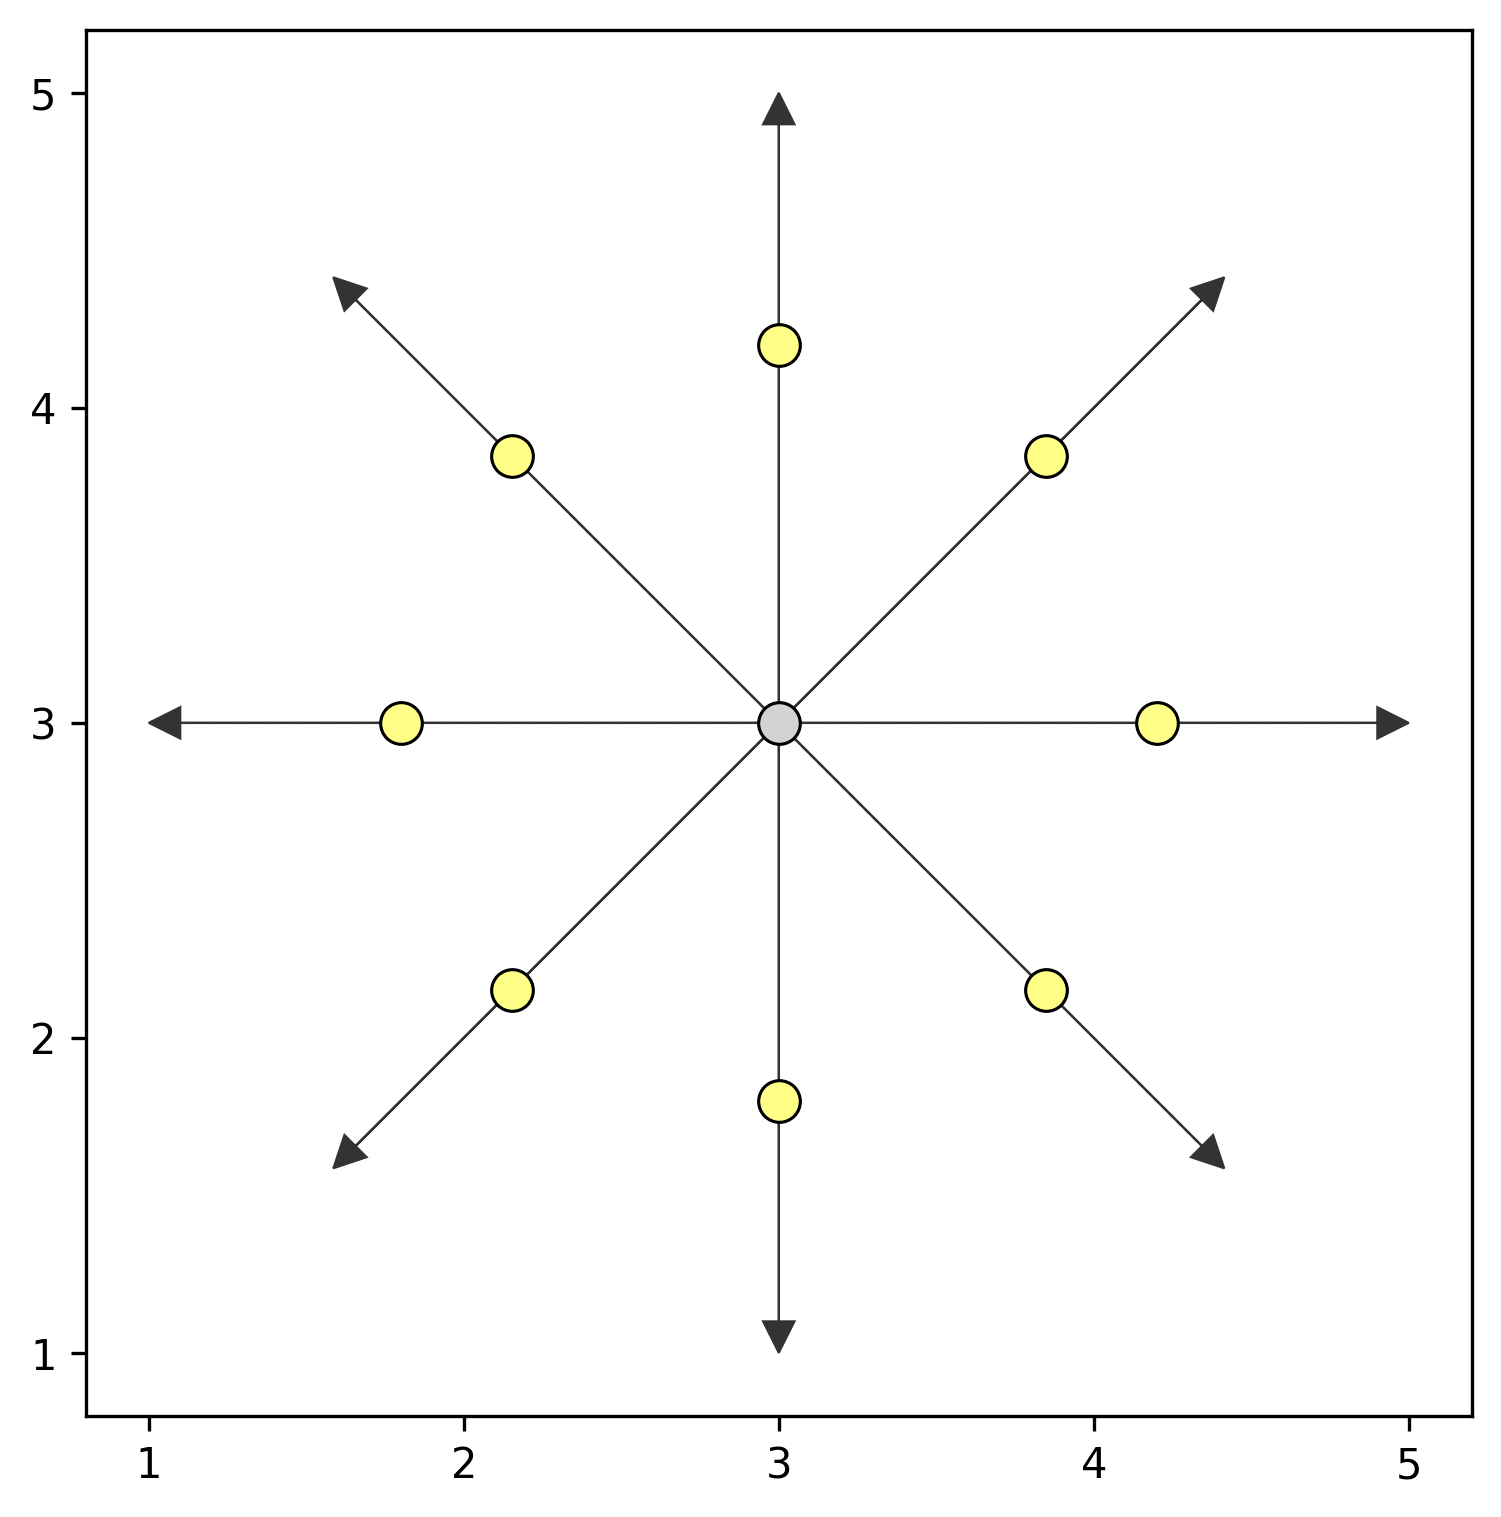

In [45]:
fix, ax = plt.subplots(figsize=(6, 6), dpi=300)

centroid = gpd.GeoSeries([Point(3, 3)])
centroid.plot(ax=ax, color=point_color_2, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

# plot lines in the specific directions and points on the lines
for angle in range(0, 360, 45):
    radians = np.radians(angle)
    line_length = 2
    centroid_x = centroid.x[0]
    centroid_y = centroid.y[0]
    end_x = centroid_x + line_length * np.cos(radians)
    end_y = centroid_y + line_length * np.sin(radians)
    if angle in range(0, 360, 45):
        point_x = centroid_x + 1.2 * np.cos(radians)
        point_y = centroid_y + 1.2 * np.sin(radians)
        point = gpd.GeoSeries([Point(point_x, point_y)])
        point.plot(ax=ax, color=point_color, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)
    
    # plot the arrow
    ax.arrow(centroid_x, centroid_y, end_x - centroid_x, end_y - centroid_y, color=line_color, linewidth=0.5, head_width=0.1, head_length=0.1, length_includes_head=True)

    ax.plot([centroid_x, end_x], [centroid_y, end_y], color=line_color, linewidth=0.5, linestyle='--')

# set x-stick
ax.set_xticks([1, 2, 3, 4, 5]);
ax.set_yticks([1, 2, 3, 4, 5]);


## 2.2 between

### 2.2.1 between two locations

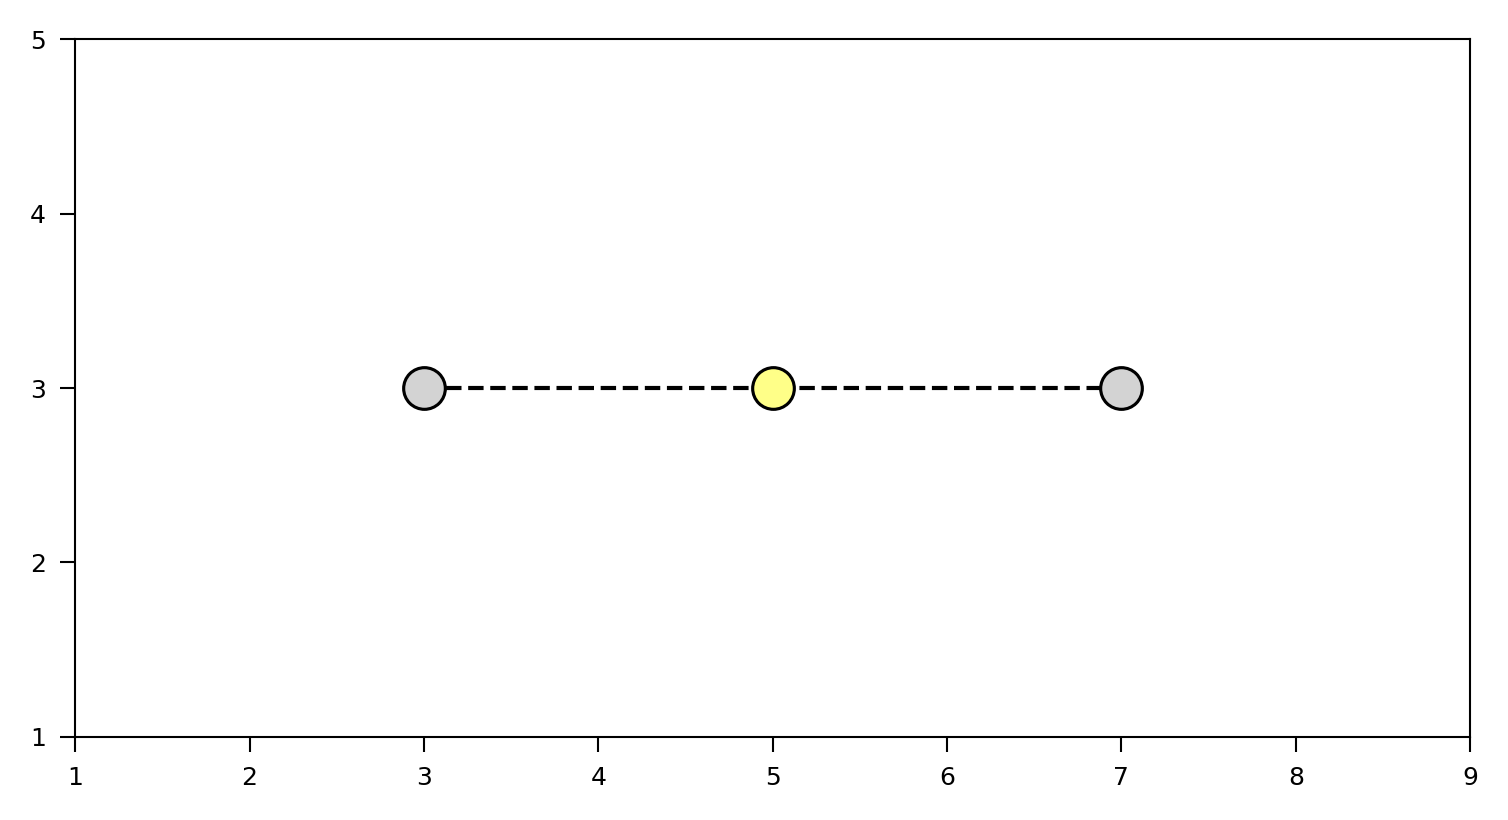

In [46]:
fix, ax = plt.subplots(figsize=(6, 6), dpi=300)

point_1 = gpd.GeoSeries([Point(3, 3)])
point_1.plot(ax=ax, color=point_color_2, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

point_2 = gpd.GeoSeries([Point(7, 3)])
point_2.plot(ax=ax, color=point_color_2, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

# plot a line connecting the two points
line = gpd.GeoSeries([LineString([(3, 3), (7, 3)])])
line.plot(ax=ax, color='black', linewidth=1, linestyle='--')

point = gpd.GeoSeries([Point(5, 3)])
point.plot(ax=ax, color=point_color, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

# set x-stick
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
ax.set_yticks([1, 2, 3, 4, 5])

# set label fontsize
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(6)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(6)

# set frame linewidth
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(0.5)

# set tick linewidth
ax.tick_params(axis='both', width=0.5)

### 2.2.2 among multiple loctions

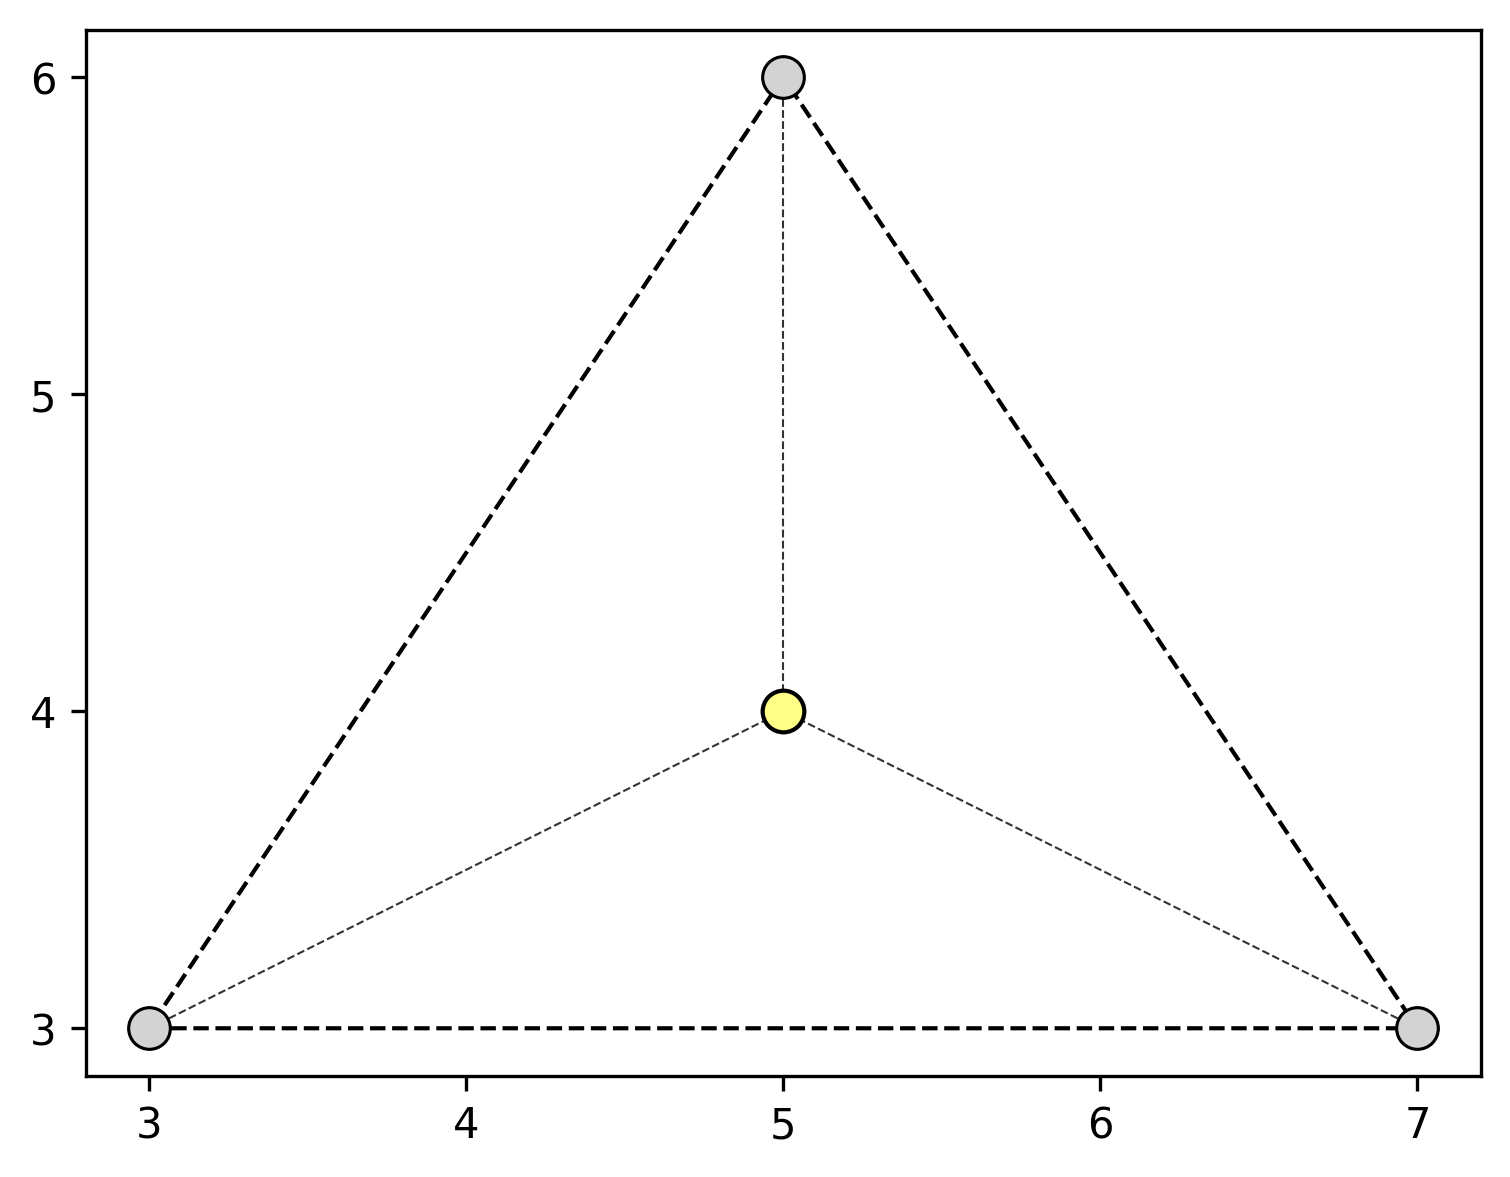

In [47]:
fix, ax = plt.subplots(figsize=(6, 6), dpi=300)

point_1 = gpd.GeoSeries([Point(3, 3)])
point_1.plot(ax=ax, color=point_color_2, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

point_2 = gpd.GeoSeries([Point(7, 3)])
point_2.plot(ax=ax, color=point_color_2, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

point_3 = gpd.GeoSeries([Point(5, 6)])
point_3.plot(ax=ax, color=point_color_2, marker='o', markersize=100, edgecolor='black', linewidth=0.75, zorder=3)

# plot a polygon connecting the three points and also pllot its centroid
polygon_points = [(3, 3), (7, 3), (5, 6)]
polygon = Polygon(polygon_points)
gdf = gpd.GeoDataFrame(index=[0], crs='EPSG:3857', geometry=[polygon])
gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=1, linestyle='--')

centroid = gdf.geometry.centroid
centroid.plot(ax=ax, color=point_color, marker='o', markersize=100, edgecolor='black', zorder=3)

for point in polygon_points:
    line = gpd.GeoSeries([LineString([point, centroid.iloc[0]])])
    line.plot(ax=ax, color=line_color, linewidth=0.5, linestyle='--')

ax.set_xticks([3, 4, 5, 6, 7]);
ax.set_yticks([3, 4, 5, 6]);